# MNIST Dataset From sklearn.datasets

In [3]:
from sklearn.datasets import fetch_openml as fml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
mnist = fml('mnist_784', version=1)

In [5]:
mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# mnist.DESCR

In [7]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


# Visualising Data

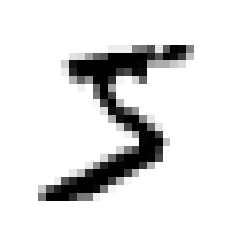

y[0] =  5


In [8]:
randomInstance = X.iloc[0]
randomInstance_image = np.array(randomInstance).reshape(28,28)
# randomInstance_image = rando,Instance.reshape(28,28)

plt.imshow(randomInstance_image, cmap=plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print("y[0] = ", y[0])
# randomInstance



# Train Test Split

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print("Size train = ", len(X_train), " || Size test = ", len(X_test))

Size train =  60000  || Size test =  10000


# Classifier Only for Number = 5 : Binary Classifier

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
# Since Binary Classifier So Use True/False array/tuple only

## Stochastic Gradient Descent classifier

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, (y_train == '5'))

SGDClassifier(random_state=42)

Classifier Says (5 Or Not) :  [False]


/home/shay/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


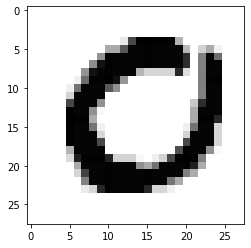

In [12]:
some_digit_index = 121    ## Within 60000
some_digit = X.iloc[some_digit_index]
print("Classifier Says (5 Or Not) : ", sgd_clf.predict([X.iloc[some_digit_index]]))

img = np.array(X.iloc[some_digit_index]).reshape(28,28)
plt.imshow(img, cmap=mpl.cm.binary)
plt.show()

In [13]:
# for i in range(0, 50, 7):
#     some_digit_index = i    ## Within 60000
#     print("Classifier Says (5 Or Not) : ", sgd_clf.predict([X.iloc[some_digit_index]])[0])

#     img = np.array(X.iloc[some_digit_index]).reshape(28,28)
#     plt.imshow(img, cmap=mpl.cm.binary)
#     plt.show()

##### Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score
metric = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print("% = ", sum(metric)*100/len(metric))
print("Metric for 3 crossvalidation sets = ", metric)

% =  95.70333333333333
Metric for 3 crossvalidation sets =  [0.95035 0.96035 0.9604 ]


There is problem with accuracy test. Only 10% of data is 5. So even a model which gives false everytime has 90% accuracy. So use confusion-matrix

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_5_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
matrix = confusion_matrix(y_train_5, y_train_5_predict)
matrix

array([[53892,   687],
       [ 1891,  3530]])

In [16]:
confusion_matrix_diagram = pd.DataFrame({"Non5" : ['true Negative', 'false Negative'], "Yes5" : ['false Positive', 'true Positive']}, index=["Non5", "Yes5"])
confusion_matrix_diagram

,Non5,Yes5
Non5,true Negative,false Positive
Yes5,false Negative,true Positive


## Precesion and Recall

In [17]:
def precision(m):
    ##      TP
    ##   ---------
    ##    TP + FP
    return m[1][1]/(m[1][1] + m[0][1])

def recall(m):
    ##      TP
    ##   ---------
    ##    TP + FN
    return m[1][1]/(m[1][1] + m[1][0])

def accuracy(m):
    ##   TP + TN
    ##   --------
    ##    Total
    return ((m[0][0] + m[1][1])/(m[0][0] + m[1][1] + m[0][1] + m[1][0]))*100

precision(matrix), recall(matrix), accuracy(matrix)

(0.8370879772350012, 0.6511713705958311, 95.70333333333333)

In [18]:
from sklearn.metrics import precision_score, recall_score
print("precision : ", precision_score(y_train_5, y_train_5_predict))
print("Recall : ", recall_score(y_train_5, y_train_5_predict))

precision :  0.8370879772350012
Recall :  0.6511713705958311


### F1 Score = 2 * (precesion * recall)/(precesion + recall)

In [19]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_5_predict)
f1

0.7325171197343846

### Precision/Recall Tradeoff
Nothing Cool or OG or lit. It says if u increase or reduce decesion bountry precesion and recall will fluctuate in inverse manner.(Intuative isn't it)

Threshold =  0  pridiction =  [ True]
Threshold =  8000  pridiction =  [False]


/home/shay/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


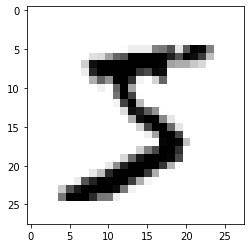

In [20]:
some_digit = X.iloc[0]

y_scores = sgd_clf.decision_function([some_digit])   ## instead of .predict() we use .decesion_function() if we want to set our own decesion thresh-hold
threshold = 0

print("Threshold = ", threshold," pridiction = ", (y_scores > threshold))   ## this is same as .predict() as its threshhold is 0


threshold = 8000

print("Threshold = ", threshold," pridiction = ", (y_scores > threshold))


img = np.array(some_digit).reshape(28,28)
plt.imshow(img, cmap=mpl.cm.binary)
plt.show()

### Creating Our Own scores based on decesion function. Like this will allow us to adjust default threshold.

## Visulaisaton : Precesion Vs recall based on threshold of classifier

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, (y_train == '5'), cv=3, method="decision_function")
## above will give you only scores. You have to compare the values with your threshold and then prdict
## by default thresh was set to 0 when we didn't use method="..." and it directly gave judgement


In [22]:
from sklearn.metrics import  precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve((y_train == '5'), y_scores)

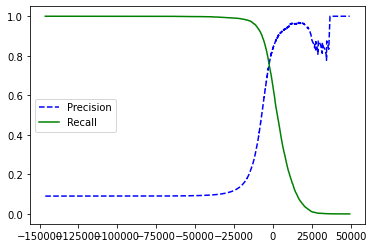

In [23]:
def plot_prec_rec_vs_thresh(preisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="best")

plot_prec_rec_vs_thresh(precisions, recalls, thresholds)
plt.show()

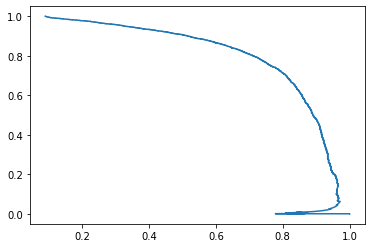

In [24]:
plt.plot(precisions[:-1], recalls[:-1])

### ROC curve

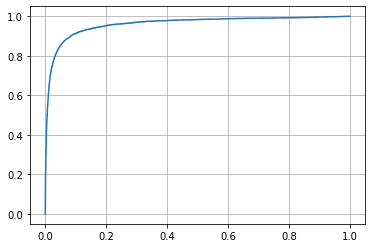

0.9604938554008616

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve((y_train == '5'), y_scores)
## false positive rate and true positive rate

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.grid()
    
plot_roc_curve(fpr, tpr)
plt.show()

from sklearn.metrics import roc_auc_score
roc_auc_score((y_train == '5'), y_scores)

# Random Forest for the same

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_prob_forest = cross_val_predict(forest_clf, X_train, (y_train == '5'), cv=3, method="predict_proba")

In [28]:
y_prob_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [30]:
y_scores_forest = y_prob_forest[: , 1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

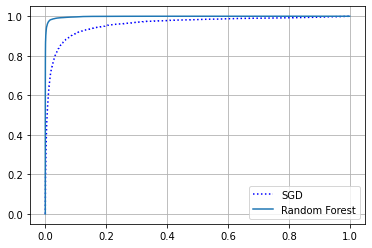

0.9983436731328145

In [33]:
fpr_forest, tpr_forest, thresh_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="best")
plt.show()

roc_auc_score(y_train_5, y_scores_forest)

## Random Forest classifier works better in this case